In [26]:
# !pip install polars

# Download các thư viện cần thiết


In [2]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Đọc file train (1 phần)


## Định nghĩa hàm đọc toàn bộ dataset


In [3]:
def read_parquet_by_type(train_path: str):
    # Lấy tất cả các file parquet trong thư mục
    files = [os.path.join(train_path, f) for f in os.listdir(train_path) if f.endswith('.parquet')]
    
    # Phân loại các file theo loại tên
    user_chunk_files = [file for file in files if 'user_chunk' in file]
    purchase_history_chunk_files = [file for file in files if 'purchase_history_daily_chunk' in file]
    item_chunk_files = [file for file in files if 'item_chunk' in file]
    
    # Đọc các file riêng biệt thành DataFrame
    user_chunk_df = pl.concat([pl.read_parquet(file) for file in user_chunk_files]) if user_chunk_files else None
    purchase_history_chunk_df = pl.concat([pl.read_parquet(file) for file in purchase_history_chunk_files]) if purchase_history_chunk_files else None
    item_chunk_df = pl.concat([pl.read_parquet(file) for file in item_chunk_files]) if item_chunk_files else None
    
    # Trả về một dictionary chứa các DataFrame
    return {
        "user_chunk": user_chunk_df,
        "purchase_history_chunk": purchase_history_chunk_df,
        "item_chunk": item_chunk_df
    }

## Đọc toàn bộ dataset


In [4]:
train_path = './dataset'
dataframes = read_parquet_by_type(train_path)

## Kiểm tra DataFrame của từng loại data trong dataset


In [5]:
print("User Chunk DataFrame:")
dataframes["user_chunk"]

User Chunk DataFrame:


customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
i32,str,i32,str,str,i64,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,i64,str,str,bool
14732,"""Nam""",155,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - Grand View Phú Mỹ Hưng""","""In-Store""",1306281600,"""7""","""e1e48206652bf8c279ff0206c69a80…",false
15126,"""Nữ""",300,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 121A Nguyễn Duy Trinh""","""In-Store""",1306281600,"""Thủ Đức""","""77891759204bd27e69fb11a7b92889…",false
29718,"""Nữ""",157,"""Bến Tre""","""Standard""",1312126692,2011-07-31 15:38:12.750,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đồng bằng sông Cửu Long""","""BTR - 179 Nguyễn Đình Chiểu""","""In-Store""",1582070400,"""Bến Tre""","""b8041b584a0bb6655361727a0a6108…",false
30077,"""Nữ""",53,"""Hồ Chí Minh""","""Standard""",1314302782,2011-08-25 20:06:22.797,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 101 Trần Quang Khải""","""In-Store""",1314230400,"""1""","""c52ceaca44a83ec41a219cfaff0e05…",false
30085,"""Nữ""",660,"""Hồ Chí Minh""","""Standard""",1314310024,2011-08-25 22:07:04.267,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 85-87 Tây Thạnh""","""In-Store""",1314230400,"""Tân Phú""","""74ac5764f5d67d341aacf238d7762f…",false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
8800478,"""Nữ""",186,"""Đồng Nai""","""Standard""",1749987601,2025-06-15 11:40:01.437,2025-09-23 17:43:56.503,2,2025-07-16 12:17:47.648696,null,"""Đông Nam Bộ""","""DON - 07 Lê Lợi""","""In-Store""",1749945600,"""Long Khánh""","""0a7d1ac011c868e8121f75a86704a7…",false
8814340,"""Nữ""",385,"""Long An""","""Standard""",1750318260,2025-06-19 07:31:00.073,2025-06-19 07:31:00.337,2,2025-07-16 12:17:47.648696,null,"""Đồng bằng sông Cửu Long""","""LAN - 277-278 ĐT835""","""In-Store""",1750291200,"""Bến Lức""","""af28e0cce3fe4a97ad95d4dcd194e6…",false
8810998,"""Nam""",1092,"""Bạc Liêu""","""Standard""",1750234662,2025-06-18 08:17:42.230,2025-06-18 08:17:42.637,2,2025-07-16 12:17:47.648696,null,"""Đồng bằng sông Cửu Long""","""BLI - Phan Ngọc Hiển""","""In-Store""",1750204800,"""Đông Hải""","""7607bd452a7b880af0505c27fd0222…",false


# Phân tích dữ liệu (EDA)


## Task 1: Phân tích đơn biến (thống kê và trực quan hóa dữ liệu)


### User_chunk dataframe


In [6]:
user_chunk_df = dataframes['user_chunk']
user_chunk_df.head()
# gender, location, province, membership, sync_status_id, sync_error_message, region, location_name, install_app, district, is_deleted.

customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
i32,str,i32,str,str,i64,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,i64,str,str,bool
14732,"""Nam""",155,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - Grand View Phú Mỹ Hưng""","""In-Store""",1306281600,"""7""","""e1e48206652bf8c279ff0206c69a80…",false
15126,"""Nữ""",300,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 121A Nguyễn Duy Trinh""","""In-Store""",1306281600,"""Thủ Đức""","""77891759204bd27e69fb11a7b92889…",false
29718,"""Nữ""",157,"""Bến Tre""","""Standard""",1312126692,2011-07-31 15:38:12.750,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đồng bằng sông Cửu Long""","""BTR - 179 Nguyễn Đình Chiểu""","""In-Store""",1582070400,"""Bến Tre""","""b8041b584a0bb6655361727a0a6108…",false
30077,"""Nữ""",53,"""Hồ Chí Minh""","""Standard""",1314302782,2011-08-25 20:06:22.797,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 101 Trần Quang Khải""","""In-Store""",1314230400,"""1""","""c52ceaca44a83ec41a219cfaff0e05…",false
30085,"""Nữ""",660,"""Hồ Chí Minh""","""Standard""",1314310024,2011-08-25 22:07:04.267,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 85-87 Tây Thạnh""","""In-Store""",1314230400,"""Tân Phú""","""74ac5764f5d67d341aacf238d7762f…",false


#### Phân tích đơn biến bằng thống kê


Ở đây tôi không sử dụng user_chunk_df.describe() vì đa số dữ liệu là dạng Categorical, không phải dạng numerical

Nếu mà mọi người tìm thấy cột nào numerical thì có thể sử dụng describe(['tên_cột']) để xem thống kê nhanh


In [7]:
# Tạo thư mục nếu chưa tồn tại
output_folder = './data/user-chunk/counts'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Các cột phân loại đã được liệt kê
categorical_columns = [
    "gender", "location", "province", "membership", "sync_status_id",
    "sync_error_message", "region", "location_name", "install_app", "district", "is_deleted"
]

# Tạo một danh sách để lưu các DataFrame tần suất của từng cột
value_counts_list = []

for col in categorical_columns:
    # Đếm tần suất cho mỗi cột
    value_counts = user_chunk_df[col].value_counts(sort=True)
    
    # Đổi tên các cột để dễ nhận diện
    value_counts = value_counts.rename({"count": f"{col}_count", col: f"{col}_value"})
    
    # Lưu DataFrame vào danh sách
    value_counts_list.append(value_counts)
    
    # Đặt tên file CSV dựa trên tên cột
    file_path = os.path.join(output_folder, f"{col}_value_counts.csv")
    
    # Lưu DataFrame vào file CSV (sử dụng Polars method)
    value_counts.write_csv(file_path)
    
    # Xuất DataFrame cho mỗi cột
    print(f"Tần suất cho cột '{col}':")
    print(value_counts)
    print(f"Đã lưu vào file: {file_path}\n")

Tần suất cho cột 'gender':
shape: (3, 2)
┌──────────────┬──────────────┐
│ gender_value ┆ gender_count │
│ ---          ┆ ---          │
│ str          ┆ u32          │
╞══════════════╪══════════════╡
│ Nữ           ┆ 3424887      │
│ Nam          ┆ 1149069      │
│ Khác         ┆ 8            │
└──────────────┴──────────────┘
Đã lưu vào file: ./data/user-chunk/counts\gender_value_counts.csv

Tần suất cho cột 'location':
shape: (995, 2)
┌────────────────┬────────────────┐
│ location_value ┆ location_count │
│ ---            ┆ ---            │
│ i32            ┆ u32            │
╞════════════════╪════════════════╡
│ 766            ┆ 22383          │
│ 455            ┆ 21746          │
│ 598            ┆ 21509          │
│ 264            ┆ 20835          │
│ 687            ┆ 20563          │
│ …              ┆ …              │
│ 479            ┆ 40             │
│ 809            ┆ 17             │
│ 826            ┆ 5              │
│ 869            ┆ 1              │
│ 491            ┆ 

In [8]:
# Các cột phân loại đã được liệt kê
categorical_columns = [
    'gender', 'location', 'province', 'membership', 'sync_status_id', 
    'sync_error_message', 'region', 'location_name', 'install_app', 'district', 'is_deleted'
]

output_folder = './data/user-chunk/mode'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Tạo một danh sách để lưu các DataFrame thống kê cho từng cột
mode_dataframes = []

# Tính toán mode cho mỗi cột phân loại
for col in categorical_columns:
    # Tính giá trị mode (giá trị xuất hiện nhiều nhất) mà không sử dụng .to_pandas()
    mode_val = user_chunk_df[col].mode()[0]  # mode() trả về một Series, ta lấy giá trị đầu tiên
    
    # Ép kiểu giá trị mode về dạng string để tránh lỗi khi gộp DataFrame
    mode_val = str(mode_val)
    
    # Tạo một DataFrame cho từng cột chứa mode
    mode_df = pl.DataFrame({
        "Column": [col],
        "Mode": [mode_val]
    })
    
    # Lưu DataFrame vào danh sách
    mode_dataframes.append(mode_df)
    
    # In từng DataFrame thống kê mode cho cột
    print(f"Mode của cột '{col}': {mode_val}")

# Ghép tất cả các DataFrame mode vào một bảng duy nhất
final_mode_df = pl.concat(mode_dataframes, how="vertical")

# In kết quả final_mode_df
final_mode_df

# Đặt tên file CSV dựa trên tên cột
file_path = os.path.join(output_folder, "final_mode_df.csv")

# Lưu DataFrame vào file CSV (sử dụng Polars method)
final_mode_df.write_csv(file_path)

final_mode_df


Mode của cột 'gender': Nữ
Mode của cột 'location': 766
Mode của cột 'province': Hồ Chí Minh
Mode của cột 'membership': Standard
Mode của cột 'sync_status_id': 2
Mode của cột 'sync_error_message': None
Mode của cột 'region': Đông Nam Bộ
Mode của cột 'location_name': DNA - 81 - 83 Nguyễn Văn Linh
Mode của cột 'install_app': In-Store
Mode của cột 'district': Thủ Đức
Mode của cột 'is_deleted': False


Column,Mode
str,str
"""gender""","""Nữ"""
"""location""","""766"""
"""province""","""Hồ Chí Minh"""
"""membership""","""Standard"""
"""sync_status_id""","""2"""
…,…
"""region""","""Đông Nam Bộ"""
"""location_name""","""DNA - 81 - 83 Nguyễn Văn Linh"""
"""install_app""","""In-Store"""


In [9]:
# Tạo thư mục nếu chưa tồn tại
output_folder = './data/user-chunk/null'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Các giá trị "không xác định" cụ thể
undefined_values = ['undefined', 'na', 'null', 'NaN', None]
unknown_value = 'không xác định'  # Giá trị cần kiểm tra là "không xác định"

# Tạo một danh sách để lưu các thống kê
null_and_unknown_stats = []

# Duyệt qua từng cột trong DataFrame
for col in user_chunk_df.columns:
    # Thống kê số lượng giá trị null
    null_count = user_chunk_df[col].is_null().sum()  # Số lượng giá trị null
    
    # Kiểm tra kiểu dữ liệu của cột
    if user_chunk_df[col].dtype == pl.Utf8:  # Nếu cột là kiểu chuỗi (Utf8)
        # Thống kê số lượng giá trị "không xác định" (giá trị là "không xác định")
        unknown_count = user_chunk_df.filter(pl.col(col) == unknown_value).shape[0]
    else:
        # Nếu cột không phải kiểu chuỗi, đặt số lượng "không xác định" là 0
        unknown_count = 0
    
    # Lưu kết quả vào danh sách
    null_and_unknown_stats.append({
        'column': col,
        'null_count': null_count,
        'unknown_count': unknown_count
    })
    
    # Xuất thông tin thống kê
    print(f"Cột '{col}':")
    print(f"  - Null count: {null_count}")
    print(f"  - Unknown ('không xác định') count: {unknown_count}")
    print("\n")

# Chuyển kết quả thống kê thành DataFrame Polars
stats_df = pl.DataFrame(null_and_unknown_stats)

# Lưu kết quả vào file CSV
file_path = os.path.join(output_folder, 'null_and_unknown_counts.csv')
stats_df.write_csv(file_path)

print(f"Đã lưu thống kê vào file: {file_path}")


Cột 'customer_id':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'gender':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'location':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'province':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'membership':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'timestamp':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'created_date':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'updated_date':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'sync_status_id':
  - Null count: 338285
  - Unknown ('không xác định') count: 0


Cột 'last_sync_date':
  - Null count: 338285
  - Unknown ('không xác định') count: 0


Cột 'sync_error_message':
  - Null count: 4573964
  - Unknown ('không xác định') count: 0


Cột 'region':
  - Null count: 0
  - Unknown ('không xác định') count: 0


Cột 'location_name':
  - Null count: 0
 

#### Phân tích đơn biến bằng trực quan hóa dữ liệu


C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\2524194277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_chunk_df[col], ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\2524194277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_chunk_df[col], ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\2524194277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=user_chunk_df[col], ax=axes[i], palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14180

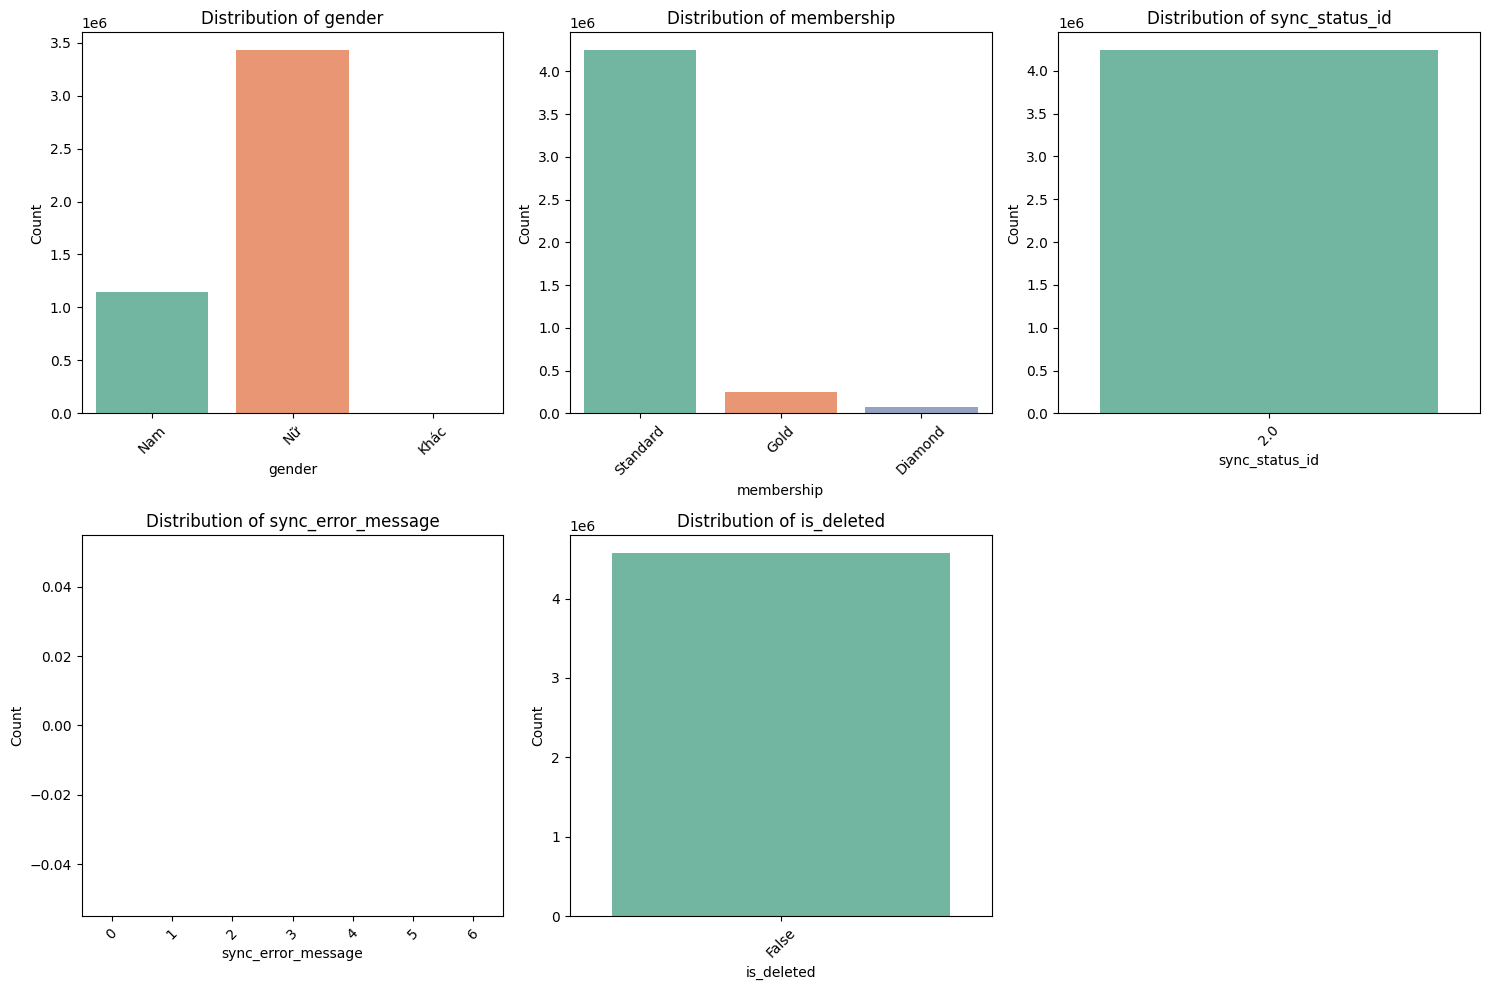

In [10]:
# Các cột cần phân tích
categorical_columns = ['gender', 'membership',	'sync_status_id', 'sync_error_message','is_deleted']


# 1. Trực quan hóa cho các cột phân loại (categorical)
num_plots = len(categorical_columns)
fig, axes = plt.subplots(nrows=(num_plots // 3) + (1 if num_plots % 3 != 0 else 0), ncols=3, figsize=(15, 5 * ((num_plots // 3) + 1)))

# Flatten axes để dễ sử dụng
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=user_chunk_df[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Nếu có biểu đồ thừa, xóa đi
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

plt.savefig("./images/user-chunk/categorical_columns_distribution1.png")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\1022288961.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['install_app'],
C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\1022288961.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['install_app'],


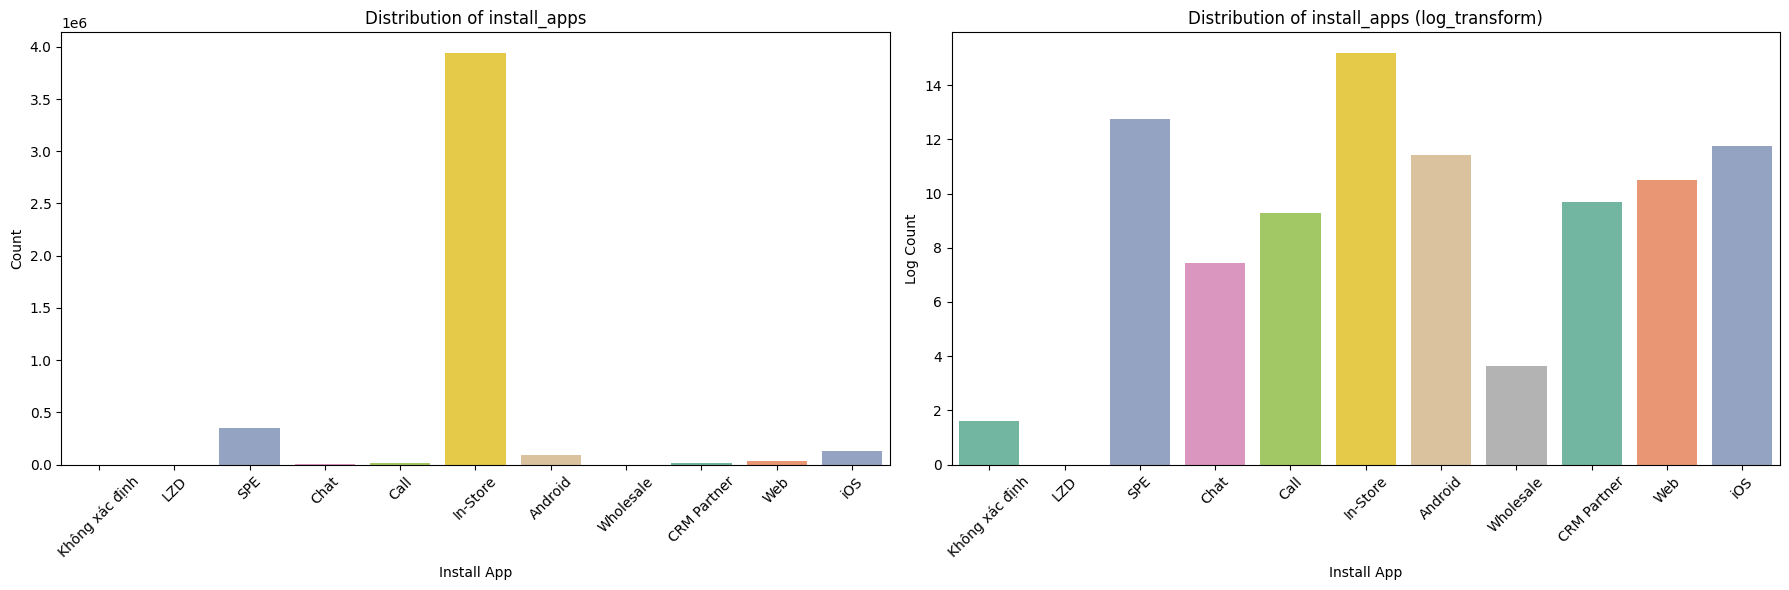

In [11]:
value_counts_location = user_chunk_df['install_app'].value_counts()

# Áp dụng log-transform cho count
value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

# Tạo 2 subplots trên cùng một hàng ngang
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Vẽ biểu đồ ban đầu (count)
sns.barplot(x=value_counts_location['install_app'], 
            y=value_counts_location['count'], 
            palette='Set2', ax=axes[0])
axes[0].set_title(f"Distribution of install_apps")
axes[0].set_xlabel("Install App")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ log-transformed
sns.barplot(x=value_counts_location['install_app'], 
            y=value_counts_location['log_counts'], 
            palette='Set2', ax=axes[1])
axes[1].set_title(f"Distribution of install_apps (log_transform)")
axes[1].set_xlabel("Install App")
axes[1].set_ylabel("Log Count")
axes[1].tick_params(axis='x', rotation=45)

# Điều chỉnh bố cục
plt.tight_layout()

plt.savefig("./images/user-chunk/categorical_columns_distribution2.png")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\3232705620.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['region'],
C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\3232705620.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['region'],


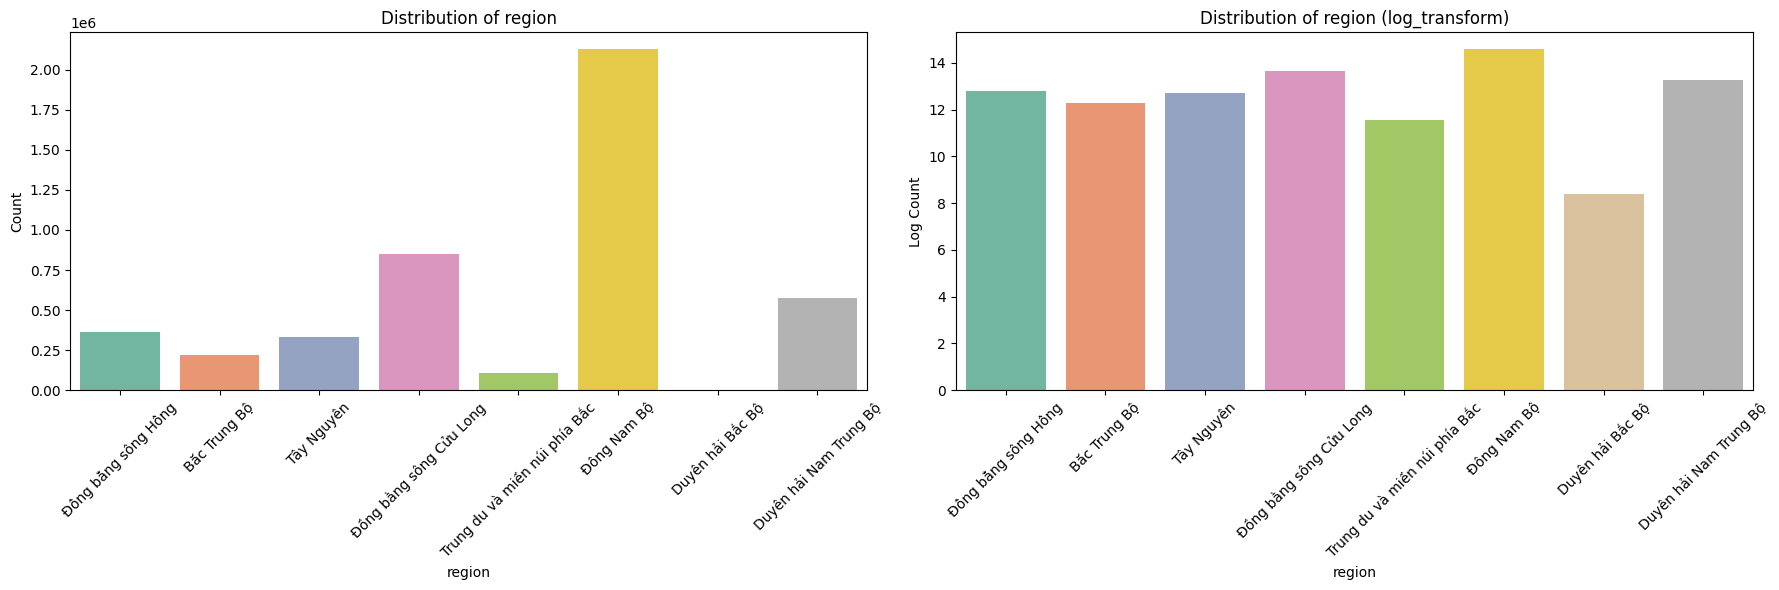

In [12]:
value_counts_location = user_chunk_df['region'].value_counts()

# Áp dụng log-transform cho count
value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

# Tạo 2 subplots trên cùng một hàng ngang
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Vẽ biểu đồ ban đầu (count)
sns.barplot(x=value_counts_location['region'], 
            y=value_counts_location['count'], 
            palette='Set2', ax=axes[0])
axes[0].set_title(f"Distribution of region")
axes[0].set_xlabel("region")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Vẽ biểu đồ log-transformed
sns.barplot(x=value_counts_location['region'], 
            y=value_counts_location['log_counts'], 
            palette='Set2', ax=axes[1])
axes[1].set_title(f"Distribution of region (log_transform)")
axes[1].set_xlabel("region")
axes[1].set_ylabel("Log Count")
axes[1].tick_params(axis='x', rotation=45)

# Điều chỉnh bố cục
plt.tight_layout()
plt.savefig("./images/user-chunk/categorical_columns_distribution3.png")


C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\4071299208.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['location'], y=value_counts_location['count'], palette='Set2')


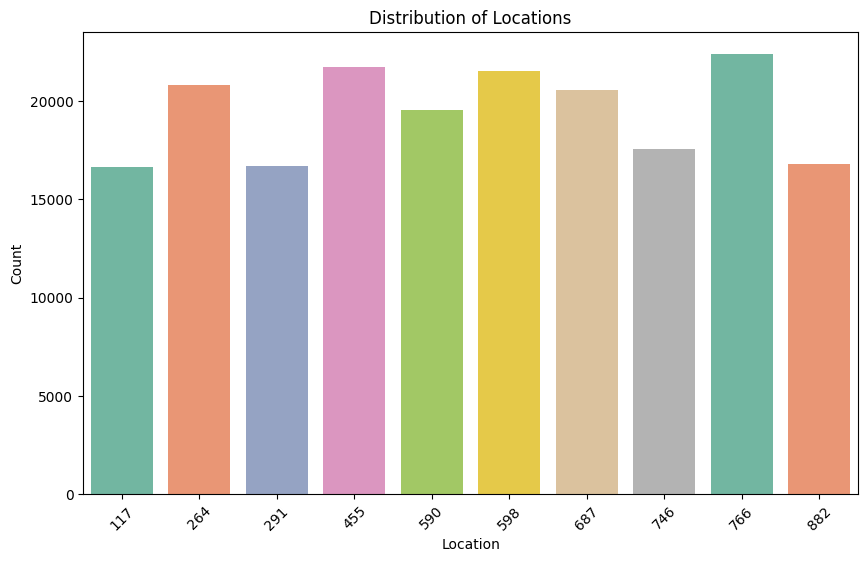

In [13]:
value_counts_location = user_chunk_df['location'].value_counts()

value_counts_location = value_counts_location.sort('count', descending=True).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts_location['location'], y=value_counts_location['count'], palette='Set2')
plt.title(f"Distribution of Locations")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig("./images/user-chunk/categorical_columns_distribution4.png")



In [14]:
# value_counts_location = user_chunk_df['location'].value_counts()


# # Lọc ra top 100 mẫu có count cao nhất
# value_counts_location = value_counts_location.sort('count', descending=True).head(10)

# value_counts_location = value_counts_location.with_columns((pl.col("count").log()).alias("log_counts"))

# # Tạo ma trận với 2 dòng và 1 cột
# fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# # Vẽ histogram cho giá trị count trên dòng 1
# sns.barplot(x=value_counts_location['location'], y=value_counts_location['count'], ax=axes[0])
# axes[0].set_title(f"Distribution of Top 100 Locations Count")
# axes[0].set_xlabel("Count")
# axes[0].set_ylabel("Frequency")

# # Vẽ histogram cho log-transformed count trên dòng 2
# sns.barplot(x=value_counts_location['location'], y=value_counts_location['log_counts'], ax=axes[1])
# axes[1].set_title(f"Distribution of Top 100 Locations (log-transformed)")
# axes[1].set_xlabel("Log(Count)")
# axes[1].set_ylabel("Frequency")

# # Hiển thị biểu đồ
# plt.tight_layout()
# plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\1529973103.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['province'], y=value_counts_location['count'], palette='Set2')


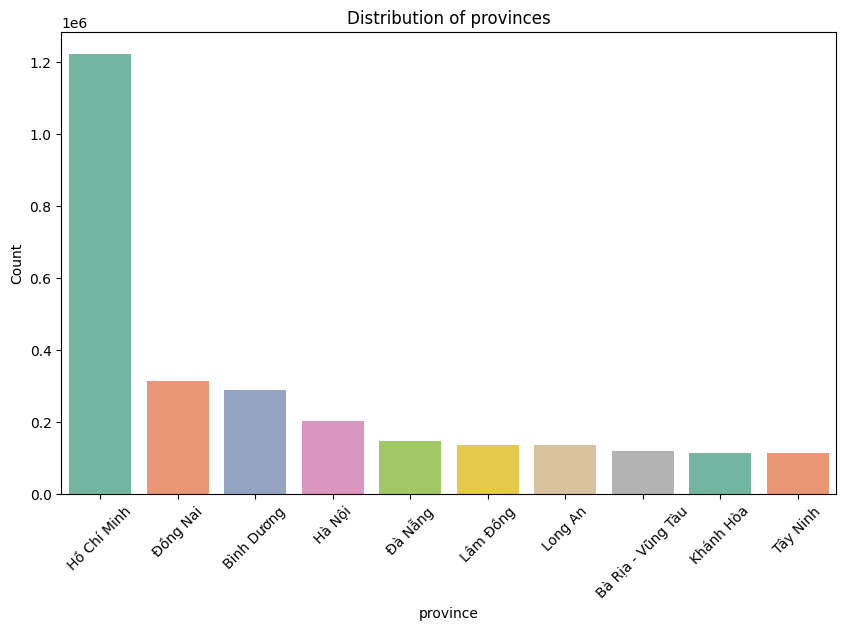

In [15]:
value_counts_location = user_chunk_df['province'].value_counts()

value_counts_location = value_counts_location.sort('count', descending=True).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts_location['province'], y=value_counts_location['count'], palette='Set2')
plt.title(f"Distribution of provinces")
plt.xlabel("province")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig("./images/user-chunk/categorical_columns_distribution5.png")



C:\Users\Admin\AppData\Local\Temp\ipykernel_14180\816394579.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts_location['district'], y=value_counts_location['count'], palette='Set2')


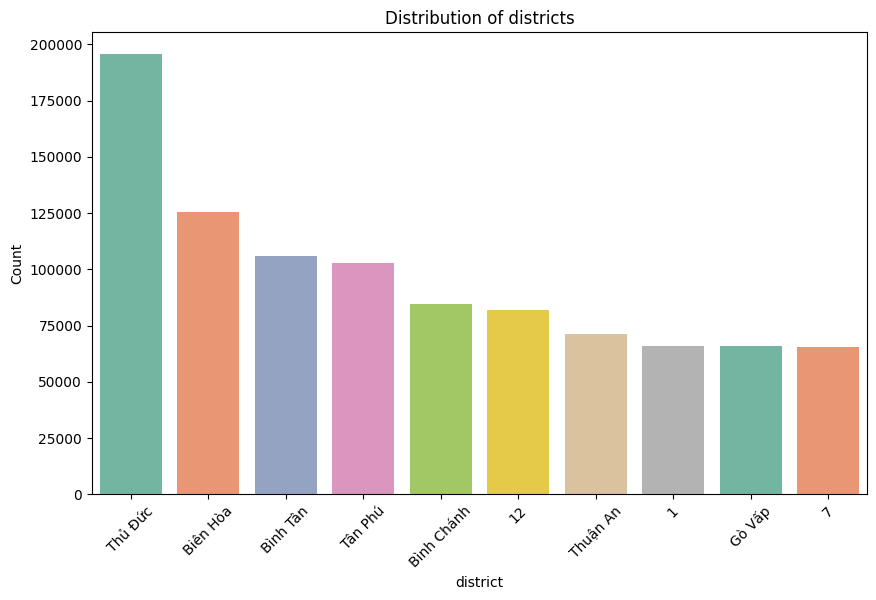

In [16]:
value_counts_location = user_chunk_df['district'].value_counts()

value_counts_location = value_counts_location.sort('count', descending=True).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts_location['district'], y=value_counts_location['count'], palette='Set2')
plt.title(f"Distribution of districts")
plt.xlabel("district")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig("./images/user-chunk/categorical_columns_distribution6.png")



## Task 2: Phân tích đa biến (thống kê và trực quan hóa dữ liệu)


In [17]:
user_chunk_df = dataframes['user_chunk']
user_chunk_df.head()

customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
i32,str,i32,str,str,i64,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,i64,str,str,bool
14732,"""Nam""",155,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - Grand View Phú Mỹ Hưng""","""In-Store""",1306281600,"""7""","""e1e48206652bf8c279ff0206c69a80…",false
15126,"""Nữ""",300,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 121A Nguyễn Duy Trinh""","""In-Store""",1306281600,"""Thủ Đức""","""77891759204bd27e69fb11a7b92889…",false
29718,"""Nữ""",157,"""Bến Tre""","""Standard""",1312126692,2011-07-31 15:38:12.750,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đồng bằng sông Cửu Long""","""BTR - 179 Nguyễn Đình Chiểu""","""In-Store""",1582070400,"""Bến Tre""","""b8041b584a0bb6655361727a0a6108…",false
30077,"""Nữ""",53,"""Hồ Chí Minh""","""Standard""",1314302782,2011-08-25 20:06:22.797,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 101 Trần Quang Khải""","""In-Store""",1314230400,"""1""","""c52ceaca44a83ec41a219cfaff0e05…",false
30085,"""Nữ""",660,"""Hồ Chí Minh""","""Standard""",1314310024,2011-08-25 22:07:04.267,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 85-87 Tây Thạnh""","""In-Store""",1314230400,"""Tân Phú""","""74ac5764f5d67d341aacf238d7762f…",false


## Phân tích đa biến bằng thống kê

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

In [19]:
# null value 'sync_error_message'

In [20]:
# Giả sử bạn đã có Polars DataFrame là user_chunk_df
# Chọn các cột phân loại
categorical_columns = ['gender', 'location', 'province', 'membership', 'sync_status_id', 
                        'region', 'location_name', 'install_app', 'district', 'is_deleted']

# Tạo bảng tần suất và kiểm định Chi-squared cho tất cả các cặp biến phân loại
results = {}

for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:  # Đảm bảo không lặp lại (col1, col2) và (col2, col1)
        
        # Tạo bảng tần suất (contingency table) giữa hai biến
        contingency_table = pd.crosstab(user_chunk_df[col1], user_chunk_df[col2])

        # Kiểm định Chi-squared
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Lưu kết quả vào dictionary
        results[(col1, col2)] = {"chi2_statistic": chi2, "p_value": p}
        
        print(f"Processed Chi-squared test for {col1} and {col2}")

# In kết quả
for (col1, col2), result in results.items():
    print(f"Chi-squared between {col1} and {col2}:")
    print(f"Chi-squared statistic: {result['chi2_statistic']}")
    print(f"P-value: {result['p_value']}")
    print("\n")


Processed Chi-squared test for gender and location
Processed Chi-squared test for gender and province
Processed Chi-squared test for gender and membership
Processed Chi-squared test for gender and sync_status_id
Processed Chi-squared test for gender and region
Processed Chi-squared test for gender and location_name
Processed Chi-squared test for gender and install_app
Processed Chi-squared test for gender and district
Processed Chi-squared test for gender and is_deleted
Processed Chi-squared test for location and province
Processed Chi-squared test for location and membership
Processed Chi-squared test for location and sync_status_id
Processed Chi-squared test for location and region
Processed Chi-squared test for location and location_name
Processed Chi-squared test for location and install_app
Processed Chi-squared test for location and district
Processed Chi-squared test for location and is_deleted
Processed Chi-squared test for province and membership
Processed Chi-squared test for

In [21]:
matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for (col1, col2), result in results.items():
    matrix.at[col1, col2] = result['p_value'], result['chi2_statistic']

# Thiết lập giá trị phía dưới đường chéo là NaN để tạo ma trận tam giác trên
for i in range(len(categorical_columns)):
    for j in range(i+1):
        matrix.iloc[i, j] = None

# Lưu ma trận vào file CSV
matrix.to_csv("./data/user-chunk/DaBien/correlation_matrix.csv", index=True)

print("Ma trận đã được lưu vào file 'correlation_matrix.csv'.")
matrix

Ma trận đã được lưu vào file 'correlation_matrix.csv'.


,gender,location,province,membership,sync_status_id,region,location_name,install_app,district,is_deleted
gender,None,"(0.0, 78258.01857353197)","(0.0, 57983.31825012561)","(0.0, 7609.829896676849)","(1.0, 0.0)","(0.0, 46761.55575987917)","(0.0, 78258.01857353197)","(0.0, 236739.72497771034)","(0.0, 100650.7687969027)","(1.0, 0.0)"
location,None,None,"(0.0, 217588409.34677398)","(0.0, 72856.7216956252)","(1.0, 0.0)","(0.0, 26709025.518895917)","(0.0, 4546520216.000001)","(0.0, 6129017.45265633)","(0.0, 1311511222.250441)","(1.0, 0.0)"
province,None,None,None,"(0.0, 36627.128049048624)","(1.0, 0.0)","(0.0, 28156040.6032919)","(0.0, 217588409.34677398)","(0.0, 2635485.7200411074)","(0.0, 431533767.80735826)","(1.0, 0.0)"
membership,None,None,None,None,"(1.0, 0.0)","(0.0, 31340.544532047694)","(0.0, 72856.7216956252)","(0.0, 36618.89707955126)","(0.0, 48176.204557281795)","(1.0, 0.0)"
sync_status_id,None,None,None,None,None,"(1.0, 0.0)","(1.0, 0.0)","(1.0, 0.0)","(1.0, 0.0)","(1.0, 0.0)"
region,None,None,None,None,None,None,"(0.0, 26709025.518895917)","(0.0, 353924.2945046477)","(0.0, 28941525.774860505)","(1.0, 0.0)"
location_name,None,None,None,None,None,None,None,"(0.0, 6129017.452656331)","(0.0, 1311511222.2504396)","(1.0, 0.0)"
install_app,None,None,None,None,None,None,None,None,"(0.0, 4919976.172437044)","(1.0, 0.0)"
district,None,None,None,None,None,None,None,None,None,"(1.0, 0.0)"
is_deleted,None,None,None,None,None,None,None,None,None,None


In [22]:
# Hàm tính Cramér's V
def cramers_v(confusion_matrix):
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    
    # Nếu chi2 = 0, nghĩa là không có sự khác biệt, set Cramér's V = 0
    if chi2 == 0:
        return 0
    else:
        return np.sqrt(chi2 / (confusion_matrix.sum() * (min(confusion_matrix.shape) - 1)))

In [23]:
# Tạo bảng tần suất và tính Cramér's V cho tất cả các cặp biến phân loại
results = {}

for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:  # Đảm bảo không lặp lại (col1, col2) và (col2, col1)
        
        # Tạo bảng tần suất (contingency table) giữa hai biến
        contingency_table = pd.crosstab(user_chunk_df[col1], user_chunk_df[col2])

        # Tính Cramér's V
        v_value = cramers_v(contingency_table.values)

        # Lưu kết quả vào dictionary
        results[(col1, col2)] = {"cramers_v": v_value}
        
        print(f"Processed Cramér's V for {col1} and {col2}")

# In kết quả
for (col1, col2), result in results.items():
    print(f"Cramér's V between {col1} and {col2}:")
    print(f"Cramér's V value: {result['cramers_v']}")
    print("\n")

Processed Cramér's V for gender and location
Processed Cramér's V for gender and province
Processed Cramér's V for gender and membership
Processed Cramér's V for gender and sync_status_id
Processed Cramér's V for gender and region
Processed Cramér's V for gender and location_name
Processed Cramér's V for gender and install_app
Processed Cramér's V for gender and district
Processed Cramér's V for gender and is_deleted
Processed Cramér's V for location and province
Processed Cramér's V for location and membership
Processed Cramér's V for location and sync_status_id
Processed Cramér's V for location and region
Processed Cramér's V for location and location_name
Processed Cramér's V for location and install_app
Processed Cramér's V for location and district
Processed Cramér's V for location and is_deleted
Processed Cramér's V for province and membership
Processed Cramér's V for province and sync_status_id
Processed Cramér's V for province and region
Processed Cramér's V for province and lo

In [24]:
# Tạo ma trận tam giác trên (upper triangular matrix) với các Cramér's V
matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for (col1, col2), result in results.items():
    matrix.at[col1, col2] = result['cramers_v']

# Thiết lập giá trị phía dưới đường chéo là NaN để tạo ma trận tam giác trên
for i in range(len(categorical_columns)):
    for j in range(i+1):
        matrix.iloc[i, j] = None

# Lưu ma trận vào file CSV
matrix.to_csv("./data/user-chunk/DaBien/cramers_v_matrix.csv", index=True)

print("Ma trận Cramér's V đã được lưu vào file 'cramers_v_matrix.csv'.")
matrix

Ma trận Cramér's V đã được lưu vào file 'cramers_v_matrix.csv'.


,gender,location,province,membership,sync_status_id,region,location_name,install_app,district,is_deleted
gender,None,0.092492,0.079614,0.028842,0,0.071496,0.092492,0.16087,0.104893,0
location,None,None,0.616902,0.089243,0,0.913342,1.0,0.366057,0.537089,0
province,None,None,None,0.063276,0,0.937757,0.616902,0.24004,0.868772,0
membership,None,None,None,None,0,0.058532,0.089243,0.063269,0.07257,0
sync_status_id,None,None,None,None,None,0,0,0,0,0
region,None,None,None,None,None,None,0.913342,0.105138,0.950748,0
location_name,None,None,None,None,None,None,None,0.366057,0.537089,0
install_app,None,None,None,None,None,None,None,None,0.327971,0
district,None,None,None,None,None,None,None,None,None,0
is_deleted,None,None,None,None,None,None,None,None,None,None


## Phân tích đa biến bằng trực quan hóa dữ liệu

## Task 3: Nhận định sơ bộ một số công việc cần làm ở bước tiền xử lý. Ví dụ:

- Những trường thông tin nào không có nhiều thông tin --> nên loại bỏ

- Những trường thông tin nào cần xử lý NULL

- Những trường thông tin nào cần xử lý ngoại lệ (Outlier)

- Những trường thông tin nào cần xử lý phân bố không đều?
